In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score 


In [ ]:
df = pd.read_csv('train.csv')
data = df[['Survived', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']].copy(True)

data = data.dropna()
data.head()

,Survived,Sex,Age,SibSp,Fare,Embarked
0,0,male,22.0,1,7.2500,S
1,1,female,38.0,1,71.2833,C
2,1,female,26.0,0,7.9250,S
3,1,female,35.0,1,53.1000,S
4,0,male,35.0,0,8.0500,S


In [ ]:
from sklearn import preprocessing

labelencoder = preprocessing.LabelEncoder()

labelencoder.fit(data['Sex'])

data ['Sex'] = labelencoder.transform(data['Sex'])

data.head()



,Survived,Sex,Age,SibSp,Fare,Embarked
0,0,1,22.0,1,7.2500,S
1,1,0,38.0,1,71.2833,C
2,1,0,26.0,0,7.9250,S
3,1,0,35.0,1,53.1000,S
4,0,1,35.0,0,8.0500,S


In [ ]:
labelencoder.fit(data['Embarked'])

data ['Embarked'] = labelencoder.transform(data['Embarked'])

data.head()

,Survived,Sex,Age,SibSp,Fare,Embarked
0,0,1,22.0,1,7.2500,2
1,1,0,38.0,1,71.2833,0
2,1,0,26.0,0,7.9250,2
3,1,0,35.0,1,53.1000,2
4,0,1,35.0,0,8.0500,2


In [ ]:
X = np.asarray(data[['Embarked', 'Sex', 'Age', 'SibSp', 'Fare',]])
y = np.asanyarray(data[['Survived']])

print (X)


[[ 2.      1.     22.      1.      7.25  ]
 [ 0.      0.     38.      1.     71.2833]
 [ 2.      0.     26.      0.      7.925 ]
 ...
 [ 2.      0.     19.      0.     30.    ]
 [ 0.      1.     26.      0.     30.    ]
 [ 1.      1.     32.      0.      7.75  ]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.25, random_state = 42)

print (X_train.shape)
print (X_test.shape)

print (y_train.shape)
print (y_test.shape)

(534, 5)
(178, 5)
(534, 1)
(178, 1)


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifier = SVC()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
print (classifier.score(X_train, y_train))
print (classifier.score(X_test, y_test))

0.8258426966292135
0.7865168539325843


In [ ]:
y_pred = classifier.predict(X_test)

print (classification_report(y_test, y_pred))

print (print("Validation Accuracy: ", accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        99
           1       0.78      0.72      0.75        79

    accuracy                           0.79       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

Validation Accuracy:  0.7865168539325843
None


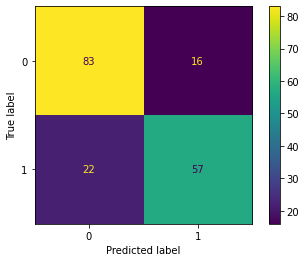

In [ ]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()